Kernel>>Restart & Run all

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cycler import cycler
import functools as ft
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import requests



C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
monterey_fishery = pd.read_csv('water/monterey_fishery.csv')
monterey_watertemp = pd.read_csv('water/monterey_watertemp.csv')

In [3]:
morro_fishery = pd.read_csv('water/morro_fishery.csv')
sanluis_watertemp = pd.read_csv('water/sanluis_watertemp.csv')

In [4]:
sd_fishery = pd.read_csv('water/sd_fishery.csv')
sd_watertemp = pd.read_csv('water/sd_watertemp.csv')

In [5]:
eureka_fishery = pd.read_csv('water/eureka_fishery.csv')

NameError: name 'fishery' is not defined

# Data Cleaning:

### Merge all the Fishery data:

In [7]:
fishery = pd.concat([morro_fishery, sd_fishery, monterey_fishery, eureka_fishery])

In [8]:
fishery.to_csv('fishery.csv')

In [9]:
fishery = fishery.drop(['Unnamed: 0'], axis = 1)

In [10]:
fishery = fishery.reset_index().drop(['index'], axis = 1)

In [11]:
fishery.shape

(5799, 4)

In [12]:
fishery.columns

Index(['Species', 'Total', 'port', 'Year'], dtype='object')

- Species: The species of the caught fish.

- Total: Total poundage of the fish caught that was reported at the specified port during that particular year.

- Port: Port where all the nearby caught fishes was reported

- Year: Year in which the fish catch was reported. 

**Species**

In [13]:
fishery['Species'] = fishery['Species'].str.replace('.',"") #cleaning the 'Species' column


C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [14]:
print(fishery['Species'].unique()) #All the unique Species of fishes

['Anchovy, northern' 'Bonito, Pacific' 'Cabezon' 'Fish, unspecified'
 'Flounder, arrowtooth' 'Flounder, starry' 'Flounder, unspecified'
 'Greenling, kelp' 'Greenling, rock' 'Grenadier' 'Hagfish, Pacific'
 'Halibut, California' 'Lingcod' 'Lizardfish, California' 'Mackerel, jack'
 'Mackerel, Pacific' 'Mackerel, unspecified' 'Opah'
 'Prickleback, monkeyface' 'Ray, bat' 'Rockfish, aurora' 'Rockfish, black'
 'Rockfish, black-and-' 'Rockfish, blackgill' 'Rockfish, blue'
 'Rockfish, bocaccio' 'Rockfish, brown' 'Rockfish, canary'
 'Rockfish, chilipepper' 'Rockfish, China' 'Rockfish, copper'
 'Rockfish, gopher' 'Rockfish, grass' 'Rockfish, greenblotched'
 'Rockfish, greenspotted' 'Rockfish, group bolina'
 'Rockfish, group gopher' 'Rockfish, group red' 'Rockfish, kelp'
 'Rockfish, olive' 'Rockfish, quillback' 'Rockfish, rosy'
 'Rockfish, speckled' 'Rockfish, starry' 'Rockfish, treefish'
 'Rockfish, vermilion' 'Rockfish, widow' 'Rockfish, yellowtail'
 'Sablefish' 'Salmon' 'Salmon, Chinook' 'Salmo

In [148]:
len(fishery['Species'].unique())

280

In [149]:
fishery['Year'].min()

2000

In [150]:
fishery['Year'].max()

2019

In [15]:
fishery

,Species,Total,port,Year
0,"Anchovy, northern",95,Morro Bay,2019
1,"Bonito, Pacific",311,Morro Bay,2019
2,Cabezon,"26,248",Morro Bay,2019
3,"Fish, unspecified",3,Morro Bay,2019
4,"Flounder, arrowtooth",14,Morro Bay,2019
...,...,...,...,...
5794,"Crab, Dungeness","4,758,757",Eureka,2000
5795,"Crab, rock unspecified","8,124",Eureka,2000
5796,"Prawn, spot",306,Eureka,2000
5797,"Shrimp, coonstriped","86,369",Eureka,2000


In [16]:
fishery.to_csv('fishery.csv')

### Merge all the water temperature data: 

In [72]:
water_temp = pd.concat([sd_watertemp, monterey_watertemp, sanluis_watertemp])

In [73]:
water_temp

,Unnamed: 0,date_val,water_temp,station,year,month
0,0,20000102,57.416667,San Diego,2000,January
1,1,20000103,57.458333,San Diego,2000,January
2,2,20000104,57.395833,San Diego,2000,January
3,3,20000105,57.316667,San Diego,2000,January
4,4,20000106,57.241667,San Diego,2000,January
...,...,...,...,...,...,...
4674,21,20141223,61.280932,Port San Luis,2014,December
4675,22,20141224,61.509865,Port San Luis,2014,December
4676,23,20141225,60.881545,Port San Luis,2014,December
4677,24,20141226,59.921610,Port San Luis,2014,December


In [18]:
water_temp = water_temp.reset_index().drop(['index','Unnamed: 0'], axis = 1)

In [18]:
water_temp.shape

(14036, 5)

In [19]:
water_temp.columns

Index(['date_val', 'water_temp', 'station', 'year', 'month'], dtype='object')

- date_val: Date on which the water temperature was recorded. format (yearmonthday)
- water_temp: Mean water temperature recorded on the specified day
- station: Station location from which water temperature was recorded
- year: year in which the water temperature was recorded
- month: month in which the water temperature was recorded

In [20]:
water_temp['year'].min()

2000

In [21]:
water_temp['year'].max()

2014

# Mean Temperature per year:

In [20]:
def mean_temp_year(dataframe):
    """
    Input: Dataframe containing column values 'water_temp' & 'year'
    ------
    Output: Dataframe with average water temperature per year
    """
    check = dataframe.pivot_table(values = 'water_temp', index = 'year', aggfunc = np.mean).reset_index()
    return check
    

In [54]:
california = mean_temp_year(water_temp)
mon_meantemp = mean_temp_year(monterey_watertemp)
sd_meantemp = mean_temp_year(sd_watertemp)
sanluis_meantemp = mean_temp_year(sanluis_watertemp)


,year,water_temp
0,2000,56.492167
1,2001,49.329533
2,2002,53.340872
3,2003,57.104724
4,2004,56.788535
5,2005,57.180040
6,2006,56.832037
7,2007,56.089135
8,2008,55.835262
9,2009,56.176295


In [56]:
mon_mean = pd.read_csv('water/monterey_meanwatertemp.csv')
sd_mean = pd.read_csv('water/sd_meanwatertemp.csv')
sanluis = pd.read_csv('water/sanluis_meanwatertemp.csv')
three = pd.concat([mon_mean, sd_mean, sanluis ])

In [59]:
three = three.drop(['date_val'], axis = 1)

In [60]:
three

,Unnamed: 0,year,month,water_temp,Station
0,0,2000,April,56.216667,Monterey
1,1,2000,August,57.324045,Monterey
2,2,2000,December,54.702439,Monterey
3,3,2000,February,55.135424,Monterey
4,4,2000,January,53.606870,Monterey
...,...,...,...,...,...
175,175,2014,March,56.716730,Port San Luis
176,176,2014,May,54.098441,Port San Luis
177,177,2014,November,60.297657,Port San Luis
178,178,2014,October,63.619605,Port San Luis


In [63]:

cres_mean = pd.read_csv('water/cres_watertemp')
cres_mean['Station'] = 'Crescent City'
cres_mean

,Unnamed: 0,month,water_temp,year,Station
0,0,April,52.945779,2000.0,Crescent City
1,1,August,58.308654,2000.0,Crescent City
2,2,December,52.376930,2000.0,Crescent City
3,3,February,52.526895,2000.0,Crescent City
4,4,January,50.223028,2000.0,Crescent City
...,...,...,...,...,...
127,7,March,53.812072,2015.0,Crescent City
128,8,May,52.371405,2015.0,Crescent City
129,9,November,55.866506,2015.0,Crescent City
130,10,October,56.891436,2015.0,Crescent City


In [64]:
ns_mean = pd.read_csv('water/ns_watertemp')
ns_mean['Station'] = 'North Spit'

In [65]:
new = pd.concat([three, ns_mean, cres_mean])

In [67]:
new = new.drop(['Unnamed: 0'], axis = 1)

In [71]:
new.to_csv('fishery_watertempmean.csv')

In [22]:
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8,'September':9, 'October':10, 'November':11, 'December':12}

#Crescent City:
cres_mean = pd.read_csv('water/cres_watertemp')
cres_mean['month_num'] = cres_mean['month'].map(month_map)
#North Spit:
ns_mean = pd.read_csv('water/ns_watertemp')
ns_mean['month_num'] = ns_mean['month'].map(month_map)
north_catemp = pd.concat([cres_mean, ns_mean]) #combine crescent, north spit to get temperature for northern california
north_catemp = north_catemp.groupby('year').mean().reset_index()


C:\Users\Ankita\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ankita\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Ankita\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


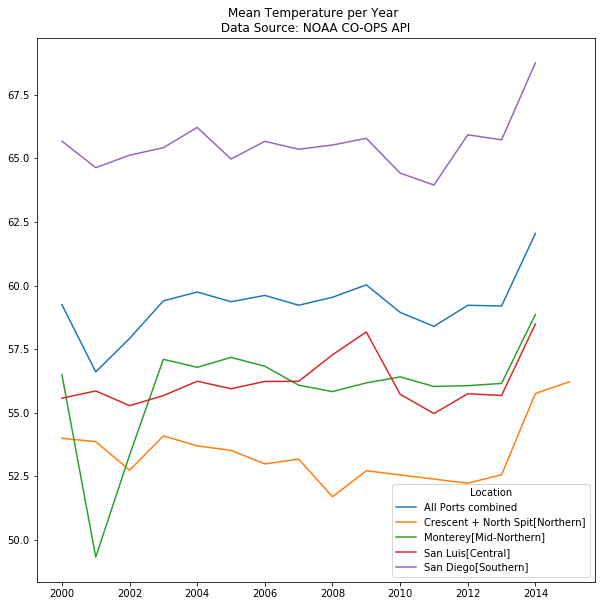

In [23]:
fig = plt.figure(figsize=(10,10))
plt.plot(california['year'], california['water_temp'])
plt.plot(north_catemp['year'], north_catemp['water_temp'])
plt.plot(mon_meantemp['year'], mon_meantemp['water_temp'])
plt.plot(sanluis_meantemp['year'], sanluis_meantemp['water_temp'])
plt.plot(sd_meantemp['year'], sd_meantemp['water_temp'])
###INCLUDE THE NORTHERN CALIFORNIA MEAN TEMP AS WELL

plt.legend(labels = ['All Ports combined', 'Crescent + North Spit[Northern]','Monterey[Mid-Northern]', 'San Luis[Central]','San Diego[Southern]'], title = 'Location', loc = 4)
plt.title('Mean Temperature per Year \n Data Source: NOAA CO-OPS API ')
plt.savefig('meantemp_peryear.png')


Sudden sharp rises seen
    - 2002-2004
    - 2009-2010
    - 2014
Sudden fall
    - 2011-2012
    - 2001
    

In [24]:
north_catemp

,year,Unnamed: 0,water_temp,month_num
0,2000.0,5.5,54.000395,6.5
1,2001.0,5.5,53.865856,6.5
2,2002.0,5.5,52.746199,6.5
3,2003.0,5.5,54.092280,6.5
4,2004.0,5.5,53.702943,6.5
5,2005.0,5.5,53.523011,6.5
6,2006.0,5.5,52.993398,6.5
7,2007.0,5.5,53.180429,6.5
8,2008.0,5.5,51.701255,6.5
9,2009.0,5.5,52.724188,6.5


# Check for trends: Expected Seasonal trend in data

In [25]:
#San Diego:
new_sdtemp = sd_watertemp.copy()
new_sdtemp['date_val'] = pd.to_datetime(new_sdtemp['date_val'], format='%Y%m%d')

C:\Users\Ankita\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ankita\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ankita\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Ankita\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will 

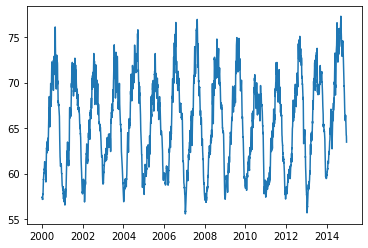

In [26]:
plt.plot(new_sdtemp['date_val'],new_sdtemp['water_temp'])

# Mean water temperature by month in each location of California:

In [27]:
def mean_month_pivot(mean_df):
    """
    Input: Takes a dataframe as input. 
            * Input Data Frame Structure: 6 columns- ['Unnamed: 0', 'year', 'month', 'date_val', 'water_temp', 'Station']
    -----
    
    Output : Returns a dataframe.
              * Data Frame Structure: 
    -------
    
    
    """
    mean_df['date_val'] = round(mean_df['date_val']).astype(int)
    mean_df['date_val'] = pd.to_datetime(mean_df['date_val'], format='%Y%m%d')
    mean_df['month_num'] = mean_df['date_val'].dt.month
    mean_df = mean_df.drop(['Unnamed: 0', 'date_val'], axis = 1)
    mean_month = mean_df.pivot_table(values = 'water_temp', index = 'month_num', columns = 'year')
    mean_month = mean_month.reset_index()
    return mean_month

In [28]:
def plot_meantemp_month(dataframe, city, legend_loc, year_remove = False):
    """
    """
    
    
    #dataframe = mean_month_pivot(mean_df)
    columns = sd_mean.columns.values.tolist()    
    columns.remove('month_num')
    
    if (year_remove== True):
        columns.remove(2010)
        columns.remove(2011)
    
    fig = plt.figure(figsize=(7,5))
    ax = plt.gca()
    ax.set_prop_cycle(cycler('color', ['b','g','r','c','m','y', 'k','tab:gray','lime','slateblue', 'maroon', 'cyan', 
                                       'sandybrown','crimson','lightpink','goldenrod','yellow','rosybrown','olive',
                                       'cadetblue', 'steelblue']))


    for i in range(len(columns)):
        ax.plot(dataframe['month_num'], dataframe[columns[i]], label = str(columns[i]))
        plt.xticks(rotation = 'vertical')
        plt.legend(title = "Year", labels = columns, loc = legend_loc, fontsize = 7, title_fontsize = 7)
        plt.title('Mean temperature per month: ' + str(city) + '\n Data Source: NOAA CO-OPS API ')
    plt.savefig(str(city)+".png")


In [32]:
#San Diego:
sd_mean = pd.read_csv('water/sd_meanwatertemp.csv')
sd_mean

#sd_mean = mean_month_pivot(sd_mean)
#plot_meantemp_month(sd_mean, 'San Diego (Southern California)', 2)


,Unnamed: 0,year,month,date_val,water_temp,Station
0,0,2000,April,20000414.5,63.574469,San Diego
1,1,2000,August,20000814.5,73.295615,San Diego
2,2,2000,December,20001214.5,60.236239,San Diego
3,3,2000,February,20000214.5,60.511526,San Diego
4,4,2000,January,20000114.5,57.999519,San Diego
...,...,...,...,...,...,...
175,175,2014,March,20140314.5,65.535011,San Diego
176,176,2014,May,20140514.5,68.421619,San Diego
177,177,2014,November,20141114.5,69.281927,San Diego
178,178,2014,October,20141014.5,73.921043,San Diego


Mostly, as the year increased the temperature increased. 

Some notable:
    - Abnormal increase in 2007 during the peak months. (August- Summer)
    - Abnormal decrease in 2010. 
    - Big increase in the winter months (possibly end-feb, march) for the year 2014. 
    

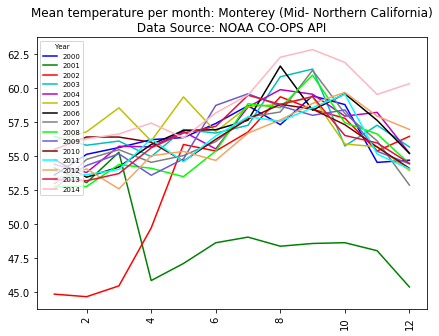

In [132]:
##Monterey
mon_mean = pd.read_csv('water/monterey_meanwatertemp.csv')
mon_mean = mean_month_pivot(mon_mean)
plot_meantemp_month(mon_mean, 'Monterey (Mid- Northern California)', 2)

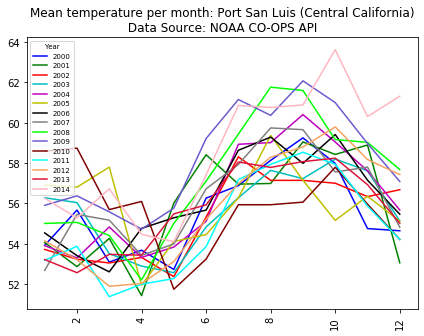

In [133]:
#Port San luis:

sanluis_mean = pd.read_csv('water/sanluis_meanwatertemp.csv')
sanluis_mean = mean_month_pivot(sanluis_mean)
plot_meantemp_month(sanluis_mean, 'Port San Luis (Central California)', 2)



In [176]:
mean_north = north_catemp.pivot_table(values = 'water_temp', index = 'month_num', columns = 'year').reset_index()

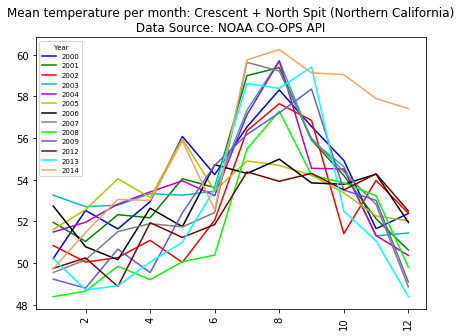

In [134]:
plot_meantemp_month(mean_north, 'Crescent + North Spit (Northern California)', 2, True)


    - Does not have temperature for the year 2010.

# Fishery Trends:

### Check for species that are present in all the years for trends:

In [225]:
fishery_pivot = fishery.copy()
fishery_pivot['Total'] = fishery_pivot['Total'].str.replace(",", "")
fishery_pivot = fishery_pivot.pivot_table(index = 'Species', columns = ['Year','port'], values = 'Total', aggfunc = np.sum)


In [164]:
def return_df(port:str):
    """
    """
    columns = list(range(2000,2019))
    input_port = str(port)
    if (input_port == 'Morro Bay'):
        columns.remove(2014)
        columns.remove(2015)
        columns.remove(2016)
        columns.remove(2017)
    if (input_port == 'Eureka'):
        columns.remove(2005)
        columns.remove(2007)
        columns.remove(2011)
        columns.remove(2014)
        
    list_append = []
    for i in range(len(columns)):
        list_append.append(pd.DataFrame(fishery_pivot[columns[i], str(port)]).dropna(how = 'any').reset_index())
    return list_append  



In [154]:
def species_year(port:str):
    """
    """
    location = return_df(str(port))
    new_df = ft.reduce(lambda right, left: pd.merge(left,right, on = 'Species'), location)
    check = new_df.transpose().reset_index().reset_index().drop(['level_1', 'index'], axis = 1)
    check.columns = check.iloc[0]
    check = check.tail(check.shape[0] -1)
    check.rename(columns = {'Species':'Year'}, inplace = True)
    return check

    

## Hierarchical Clustering:

In [155]:
def dtype_int(x):
    """
    Change the datatype of an input to integer.
    """
    try:
        return int(x)
    except: 
        return np.nan


In [156]:
def datatype_int(port:str):
    """
    Input: 
     - Takes a dataframe as input.
    Output:
     - Changes the series object of the dataframe to integer.
    """
    dataframe = species_year(str(port))
    columns = list(dataframe.columns)
    columns.remove('Year')
    df = dataframe.set_index('Year')
    for i in range(len(columns)):
        df[columns[i]]= df[columns[i]].apply(dtype_int)
    return df

In [157]:
def dendrogram(port:str):
    """
    """

    df = datatype_int(port)

    #Using hierarchical clustering with complete linkage (with Euclidean distance), cluster the years.

    distances = squareform(pdist(df))
    L = linkage(distances, method="complete")
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram- Complete Linkage for Fishing Port: '+ str(port)+'\n'+\
             'Data Source: California Department of Fish and Wildlife')
    plt.xlabel('Sample Index value for Years')
    plt.ylabel('distance')

    Z = hierarchy.dendrogram(
        L,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.savefig(str(port) + 'dendrogram.png')



In [158]:
def print_clusters(port:str, no_clusters:int):
    """
    Input:
        - port: String value
        - no_clusters: Integer value
    Output: 
        - 
    """
    df = datatype_int(str(port))
    cluster = AgglomerativeClustering(n_clusters= no_clusters, affinity='euclidean', linkage='complete')
    new = cluster.fit_predict(df)
    values = df.shape[0]
    a= pd.DataFrame(list(range(values)))
    a['years'] = pd.DataFrame(df.index)
    a['clusters'] = pd.DataFrame(new)
    return a


**San Diego (Southern)**

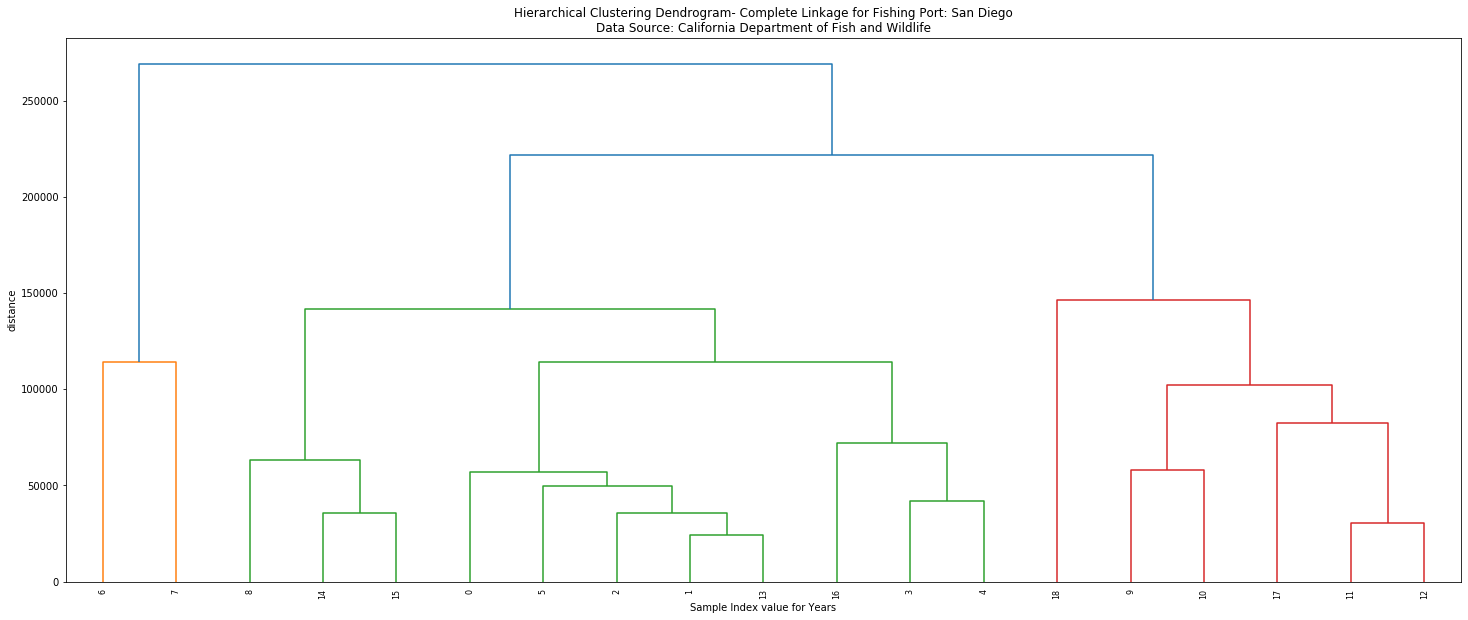

In [159]:
dendrogram('San Diego')

In [232]:
datatype_int('San Diego').reset_index().columns

C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Index(['Year', 'Barracuda, California', 'Bass, giant sea', 'Cabezon',
       'Dolphin (fish)', 'Halibut, California', 'Lingcod', 'Mackerel, Pacific',
       'Opah', 'Rockfish, blackgill'],
      dtype='object', name=0)

3 main clusters:

8-14-15: 2010, 2004,2003-- El nino event
16-3-4: 2002,spring 2015,2014 -- Pacific Warm Anomaly



**Monterey (Mid- Northern)**

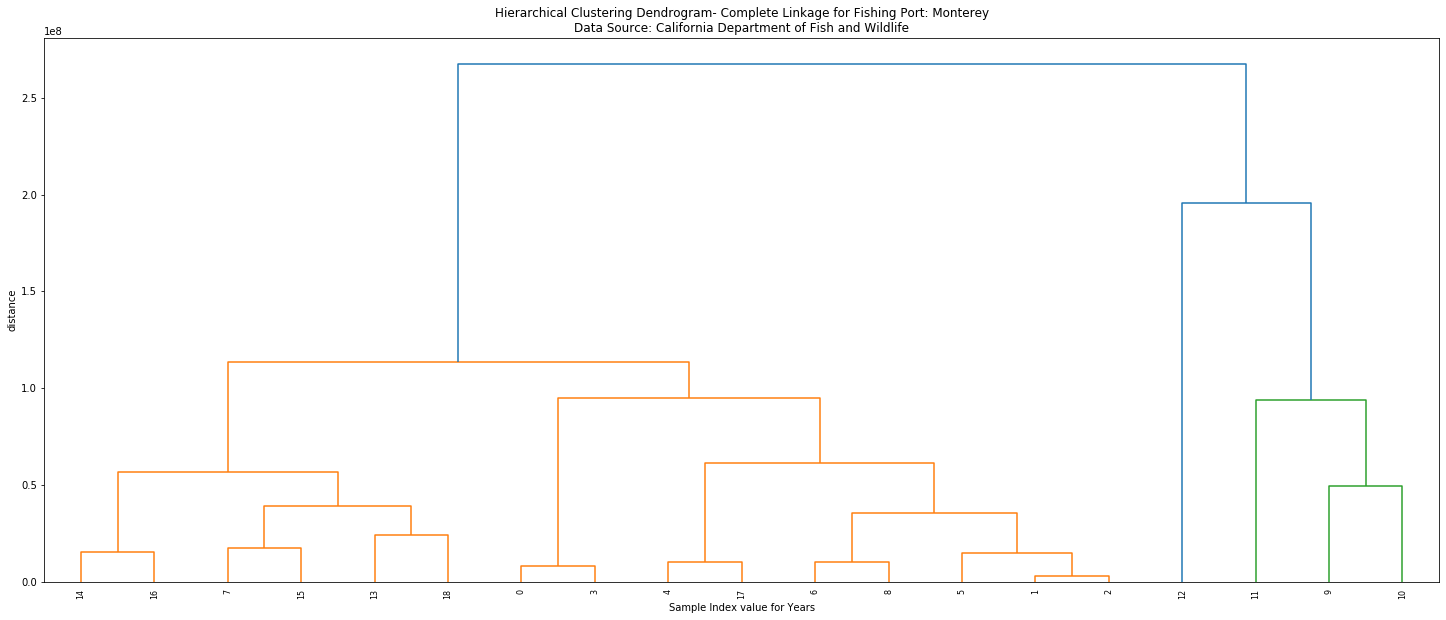

In [139]:
dendrogram('Monterey')

In [234]:
len(datatype_int('Monterey').columns)

35

**Morro Bay (Central)**

C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


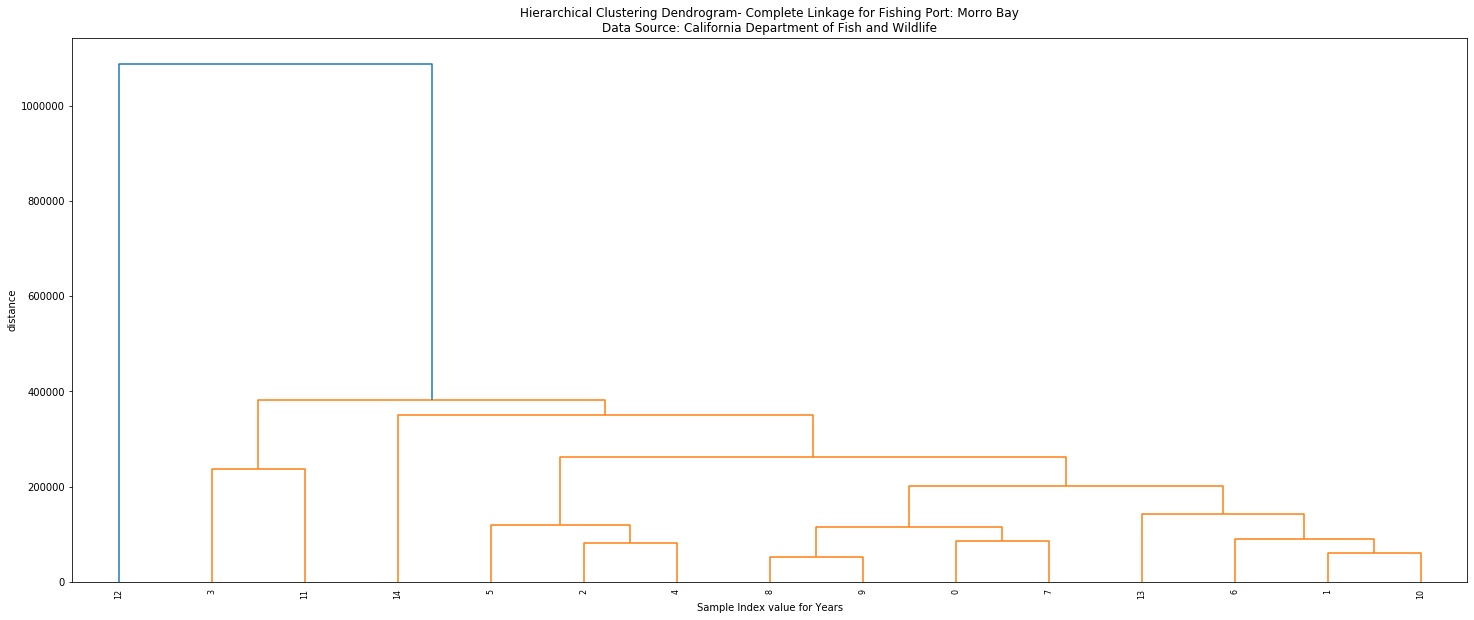

In [138]:
dendrogram('Morro Bay') 

Does not have certain years included. 

In [235]:
len(datatype_int('Morro Bay').columns)

24

**Eureka (Northern)**

C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


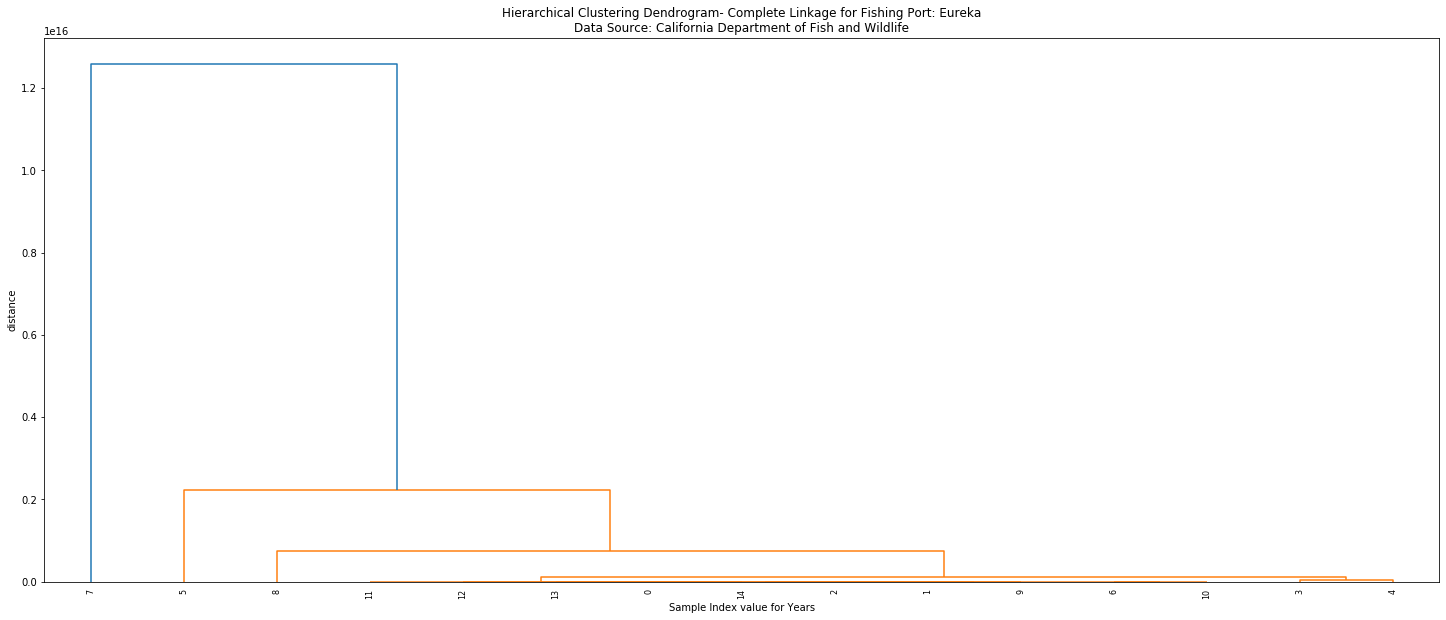

In [166]:
dendrogram('Eureka')

In [236]:
len(datatype_int('Eureka').columns)

36

## FISHERY AND WATER TEMPERATURE:

### Fishes Present in every year: 

San Diego:
2004, 2014, 8 
2002, 2014

In [248]:
eu_fish = list(datatype_int('Eureka').columns)

In [247]:
morro_fish = list(datatype_int('Morro Bay').columns)

In [246]:
mon_fish = list(datatype_int('Monterey').columns)

In [245]:
sd_fish = list(datatype_int('San Diego').columns)

In [250]:
list(set(eu_fish) & set(morro_fish) & set(mon_fish) )

['Rockfish, black',
 'Flounder, starry',
 'Greenling, kelp',
 'Lingcod',
 'Rockfish, chilipepper',
 'Rockfish, copper',
 'Cabezon',
 'Rockfish, black-and-yellow',
 'Rockfish, blue',
 'Rockfish, brown',
 'Rockfish, bocaccio',
 'Rockfish, vermilion',
 'Rockfish, gopher',
 'Rockfish, grass',
 'Rockfish, China']

In [251]:
list(set(eu_fish) & set(morro_fish) & set(mon_fish) & set(sd_fish) )

['Lingcod', 'Cabezon']

# Lingcod:


In [323]:
lingcod = fishery[fishery['Species'] == 'Lingcod']
piv_ling = lingcod.pivot_table(index = 'Year', values = 'Total',columns = 'port', aggfunc = sum).reset_index()

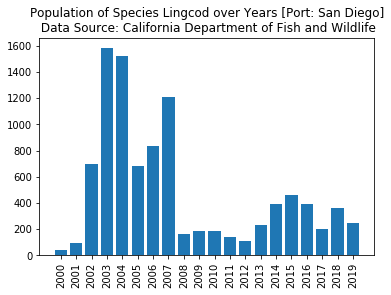

In [344]:
plt.bar(piv_ling['Year'].apply(str),piv_ling['San Diego'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')

plt.title('Population of Species Lingcod over Years [Port: San Diego]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('lincod_sd.png')

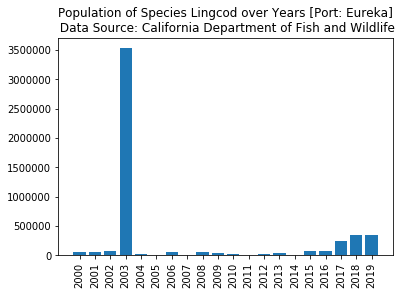

In [345]:
plt.bar(piv_ling['Year'].apply(str),piv_ling['Eureka'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')

plt.title('Population of Species Lingcod over Years [Port: Eureka]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('lincod_eu.png')

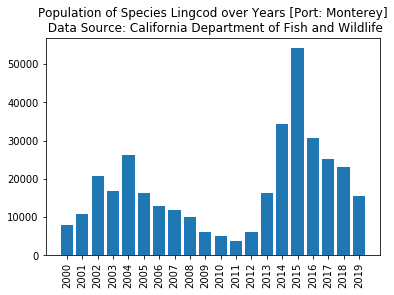

In [346]:
plt.bar(piv_ling['Year'].apply(str),piv_ling['Monterey'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')

plt.title('Population of Species Lingcod over Years [Port: Monterey]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('lincod_mon.png')

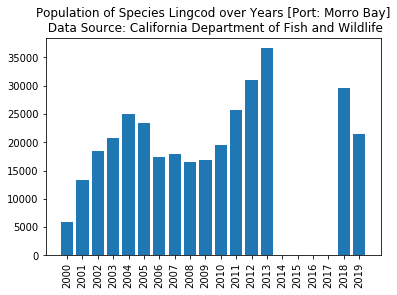

In [347]:
plt.bar(piv_ling['Year'].apply(str),piv_ling['Morro Bay'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')

plt.title('Population of Species Lingcod over Years [Port: Morro Bay]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('lincod_morro.png')

# Cabezon: 

In [339]:
cabezon = fishery[fishery['Species'] == 'Cabezon']
piv_cabe = cabezon.pivot_table(index = 'Year', values = 'Total',columns = 'port', aggfunc = sum).reset_index()


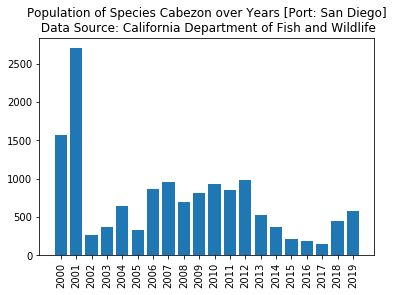

In [340]:
plt.bar(piv_cabe['Year'].apply(str),piv_cabe['San Diego'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')
plt.title('Population of Species Cabezon over Years [Port: San Diego]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('cabezon_sd.png')

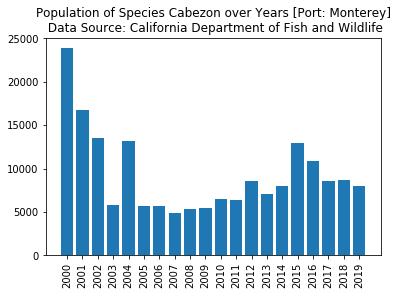

In [341]:
plt.bar(piv_cabe['Year'].apply(str),piv_cabe['Monterey'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')

plt.title('Population of Species Cabezon over Years [Port: Monterey]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('cabezon_monterey.png')

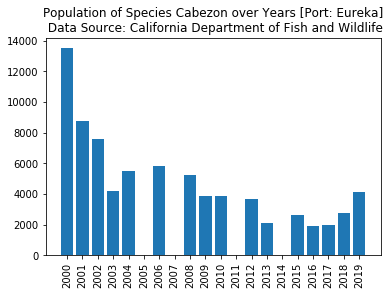

In [342]:
plt.bar(piv_cabe['Year'].apply(str),piv_cabe['Eureka'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')

plt.title('Population of Species Cabezon over Years [Port: Eureka]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('cabezon_eu.png')

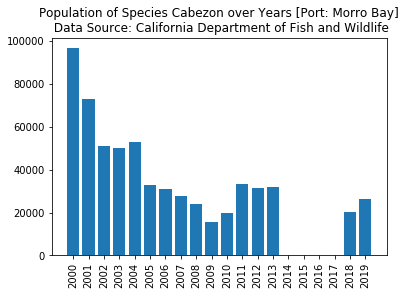

In [343]:
plt.bar(piv_cabe['Year'].apply(str),piv_cabe['Morro Bay'].str.replace(",","").apply(dtype_int))
plt.xticks(rotation = 'vertical')

plt.title('Population of Species Cabezon over Years [Port: Morro Bay]\n Data Source: California Department of Fish and Wildlife')
plt.savefig('cabezon_morro.png')

# No of newer species than previous year:

**Morro Bay**

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


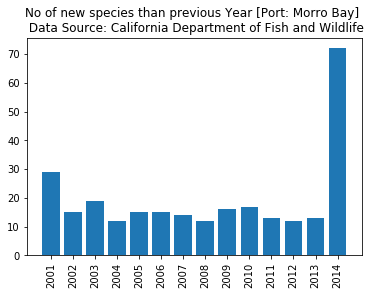

In [420]:
morro_new = morro_fishery.copy()
morro_new['Species'] = morro_new['Species'].str.replace(".","")
morro_new['Total'] = morro_new['Total'].str.replace(",","").apply(dtype_int)
new_sp = []
for i in range(2000,2014):
    count = len(morro_new[morro_new['Year'] == i]['Species'])
    same = len(set(morro_new[morro_new['Year'] == i]['Species']) & set(morro_new[morro_new['Year'] == i+1]['Species']))
    new_sp.append(count-same)
a = pd.DataFrame(list(range(2001,2015)), new_sp).reset_index()
a.columns = ['Species_count', 'Year']
plt.bar(a['Year'].astype(str), a['Species_count'])
plt.xticks(rotation = 'vertical')
plt.title('No of new species than previous Year [Port: Morro Bay] \n Data Source: California Department of Fish and Wildlife')
plt.savefig('morro_new_sp.png')

**San Diego**

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


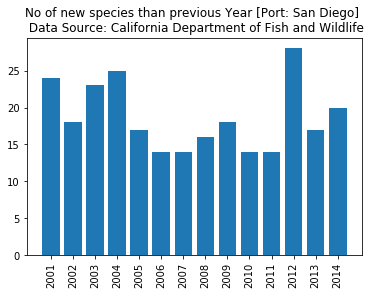

In [424]:
sd_new = sd_fishery.copy()
sd_new['Species'] = sd_new['Species'].str.replace(".","")
sd_new['Total'] = sd_new['Total'].str.replace(",","").apply(dtype_int)
new_sp = []
for i in range(2000,2014):
    count = len(sd_new[sd_new['Year'] == i]['Species'])
    same = len(set(sd_new[sd_new['Year'] == i]['Species']) & set(sd_new[sd_new['Year'] == i+1]['Species']))
    new_sp.append(count-same)
a = pd.DataFrame(list(range(2001,2015)), new_sp).reset_index()
a.columns = ['Species_count', 'Year']
plt.bar(a['Year'].astype(str), a['Species_count'])
plt.xticks(rotation = 'vertical')
plt.title('No of new species than previous Year [Port: San Diego] \n Data Source: California Department of Fish and Wildlife')
plt.savefig('sd_new_fish.png')

**Eureka**

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


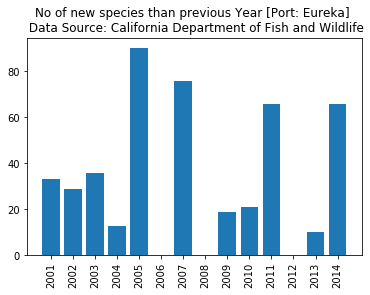

In [425]:
eu_new = eureka_fishery.copy()
eu_new['Species'] = eu_new['Species'].str.replace(".","")
eu_new['Total'] = eu_new['Total'].str.replace(",","").apply(dtype_int)
new_sp = []
for i in range(2000,2014):
    count = len(eu_new[eu_new['Year'] == i]['Species'])
    same = len(set(eu_new[eu_new['Year'] == i]['Species']) & set(eu_new[eu_new['Year'] == i+1]['Species']))
    new_sp.append(count-same)
a = pd.DataFrame(list(range(2001,2015)), new_sp).reset_index()
a.columns = ['Species_count', 'Year']
plt.bar(a['Year'].astype(str), a['Species_count'])
plt.xticks(rotation = 'vertical')
plt.title('No of new species than previous Year [Port: Eureka] \n Data Source: California Department of Fish and Wildlife')
plt.savefig('eureka_new_fish.png')

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


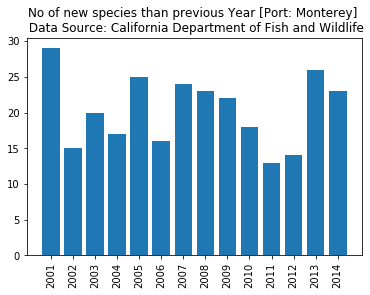

In [426]:
mon_new = monterey_fishery.copy()
mon_new['Species'] = mon_new['Species'].str.replace(".","")
mon_new['Total'] = mon_new['Total'].str.replace(",","").apply(dtype_int)
new_sp = []
for i in range(2000,2014):
    count = len(mon_new[mon_new['Year'] == i]['Species'])
    same = len(set(mon_new[mon_new['Year'] == i]['Species']) & set(mon_new[mon_new['Year'] == i+1]['Species']))
    new_sp.append(count-same)
a = pd.DataFrame(list(range(2001,2015)), new_sp).reset_index()
a.columns = ['Species_count', 'Year']
plt.bar(a['Year'].astype(str), a['Species_count'])
plt.xticks(rotation = 'vertical')
plt.title('No of new species than previous Year [Port: Monterey] \n Data Source: California Department of Fish and Wildlife')
plt.savefig('monterey_new_fish.png')

# Density plots according to port:

- fishery 


     

### Fishery in Highest temp years in the entire fishery dataset

### Fishery in Lowest temp years in the entire fishery dataset